<h1 dir = "ltr">Prioritizing hypotheses and analysing A/B test results
<h2 dir="ltr">Introduction</h2>
<div dir="ltr">The following report contains a detailed analysis of an A/B test results, lasted for a month at August 2019. Data includes data on visits per tested group, data with orders details per group and a file with suggested hypotheses and the parameters needed to evaluate their priority. The analysis was performed in order to determine which hypotheses may help boost revenue, and then analyze test results. <br>
The report consists of the following sections:
<ul>
    <li><a href="#Dealing">Obtaining data, and preliminary evaluation of data quality</a></li>
    <li><a href="#pre">Pre-processing of the obtained data:</a></li>
        <ul>
            <li><a href="#nun">Missing values</a></li>
            <li><a href="#dup">Duplicates</a></li>
            <li><a href="#type">Data type</a></li>
        </ul>
    <li><a href="#analysis">Analysis:</a></li>
        <ul>
            <li><a href="#part1">Part 1. Prioritizing Hypotheses</a></li>
            <ul>
                <li><a href="#ice">Apply the ICE framework to prioritize hypotheses</a></li>
                <li><a href="#rice">Apply the RICE framework to prioritize hypotheses</a></li>
                <li><a href="#prio">Conclusion and explanation</a></li>
            </ul>
            <li><a href="#part2">Part 2. A/B Test Analysis</a></li>
            <ul>
                <li><a href="#one">Cumulative revenue by group</a></li>
                <li><a href="#two">Cumulative average order size by group</a></li>
                <li><a href="#three">Relative difference in cumulative average order size between group B and A</a></li>
                <li><a href="#four">Conversion rate per group per day.</a></li>
                <li><a href="#five">Scatter chart of the number of orders per user </a></li>
                <li><a href="#six">Top percentiles for the number of orders per user </a></li>
                <li><a href="#seven">Scatter chart of order prices</a></li>
                <li><a href="#eight">Top percentiles of order prices </a></li>
                <li><a href="#nine">Difference in conversion between the groups (raw data) </a></li>
                <li><a href="#ten">Difference in average order size between the groups (raw data)</a></li>
                <li><a href="#eleven">Difference in conversion between the groups (filtered data)</a></li>
                <li><a href="#twelve">Difference in average order size between the groups (filtered data)</a></li>
                <li><a href="#thirdteen">Final decision based on the test results</a></li>
            </ul>
        </ul> 
    <li><a href="#conclusion">Final conclusions </a></li>
</ul>

</div>

###  <a id="Dealing"></a>Obtaining users data, and preliminary evaluation of data quality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt

#In order to show all prints:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [2]:
try:
    hypotheses = pd.read_csv('hypotheses_us.csv')
    orders_us = pd.read_csv('orders_us.csv', parse_dates=['date'])
    visits = pd.read_csv('visits_us.csv', parse_dates=['date'])

except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')
    orders_us = pd.read_csv('/datasets/orders_us.csv', parse_dates=['date'])
    visits = pd.read_csv('/datasets/visits_us.csv', parse_dates=['date'])

hypotheses.info()
orders_us.info()
visits.info()
hypotheses.head()
orders_us.head()
visits.tail()
orders_us.describe()
visits.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 colum

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


### <a id="pre"></a>Pre-processing of the obtained data

In [3]:
#spliting into 5 different columns:
hypotheses = hypotheses['Hypothesis;Reach;Impact;Confidence;Effort'].str.split(';', expand=True)
hypotheses.columns = ['Hypothesis','Reach','Impact','Confidence','Effort']
hypotheses.columns = hypotheses.columns.str.lower()

hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


#### <a id="nun"></a>Missing values

In [6]:
orders_us.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

#### <a id="dup"></a>Duplicates

In [7]:
len(orders_us[orders_us.duplicated()])
len(orders_us[orders_us.duplicated('transactionId')])

#removing users that apear in both groups:
groupA = orders_us.query('group == "A"')
groupB = orders_us.query('group == "B"')
usersInAB = groupA.query('visitorId in @groupB.visitorId')
usersInBA = groupB.query('visitorId in @groupA.visitorId')
len(usersInAB)
len(usersInBA)
orders = orders_us.query('visitorId not in @usersInAB.visitorId')

0

0

89

92

#### <a id="type"></a> Data type  

In [8]:
hypotheses.reach = hypotheses.reach.astype(int)
hypotheses.impact = hypotheses.impact.astype(int)
hypotheses.confidence = hypotheses.confidence.astype(int)
hypotheses.effort = hypotheses.effort.astype(int)

### <a id="analysis"></a> Analysis

### <a id="part1"></a> Part 1. Prioritizing Hypotheses

#### <a id="ice"></a>Apply the ICE framework to prioritize hypotheses  

In [9]:
hypotheses['ICE'] = hypotheses['impact']*hypotheses['confidence']/hypotheses['effort']
hypotheses.sort_values('ICE', ascending = False)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


#### <a id="rice"></a> Apply the RICE framework to prioritize hypotheses  

In [10]:
hypotheses['RICE'] = hypotheses['reach']*hypotheses['impact']*hypotheses['confidence']/hypotheses['effort']
hypotheses.sort_values('RICE', ascending = False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


#### <a id="prio"></a> Conclusion and explanation

We can see that when calculating by ICE method, the hypothesis with the highest score is no. 8.  
When calculating by RICE method, the hypothesis with the highest score is no. 7, and no.8 is rated the 5th.  
The explanation for that is that when calculating RICE, we consider also the reach parameter. The reach parameter is an evaluation of the share of users you reach when testing your hypothesis. Since hypothesis no.7 has reach value of 10 - it means that you will reach the maximal desired number of users when testing hypothesis no.7. However, Hypothesis no.8 will reach only 10% of that number (reach score=1). Within this group the impact is very high, but since its reacing less users (1/10), and the impact apply only on those users, the net impact is lower. Therefore it is rated lower in RICH score. 

### <a id="part2"></a> Part 2. A/B Test Analysis 

In [11]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


#### <a id="one"></a> Cumulative revenue by group

In [12]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'transactionId' : pd.Series.nunique,
        'visitorId' : pd.Series.nunique,
        'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [13]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

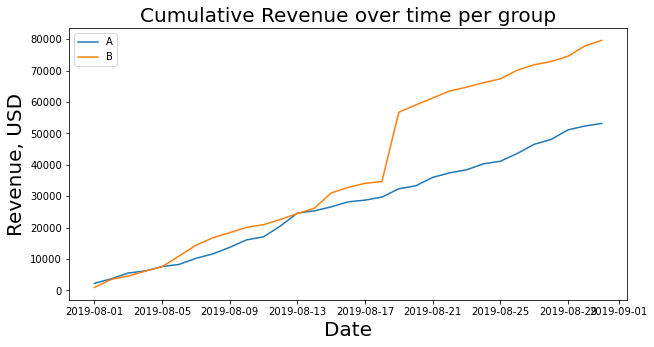

In [15]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting groups A and B revenue graphs: 
fig=plt.figure(figsize=(10,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Cumulative Revenue over time per group', size=20)
plt.xlabel('Date', size=20)
plt.ylabel('Revenue, USD', size=20)

plt.legend(); 

Revenue is rising steadily throughout the whole test for both groups. In the first few days the revenue of both groups was similar, but then group B took the lead, and the revenue of group B was higher than group A along the rest of the test. It seems that during the test there was a jump in revenue of group B (abnormally big order, or abnormally number of orders) which leads to increased difference between the groups (group B with much higher revenue). We will look at cumulative order size in order to see whether this jump was caused by abnormally big order. There were additional jumps in Group A and B, but much smaller. We will have to remove the cause for these jumps later in analysis. 

#### <a id="two"></a> Cumulative average order size by group

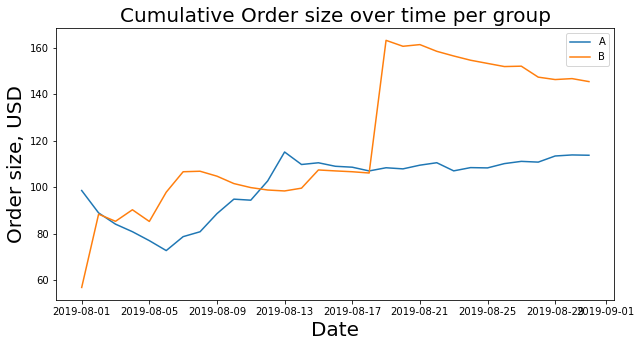

In [16]:
fig=plt.figure(figsize=(10,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Cumulative Order size over time per group', size=20)
plt.xlabel('Date', size=20)
plt.ylabel('Order size, USD', size=20)
plt.legend(); 

Cumulative average purchase sizes are flactuating. The peaks in group A and B may have been due to abnormally large, expensive orders. Order size of group A becomes steady towards the end of the test, but orders size of group B seems to be falling toward the end of the test. We need more data on this group to find the true average purchase size and establish its level. Therefore,  we will plot a relative difference graph for the average purchase sizes.

#### <a id="three"></a> Relative difference in cumulative average order size between group B and A

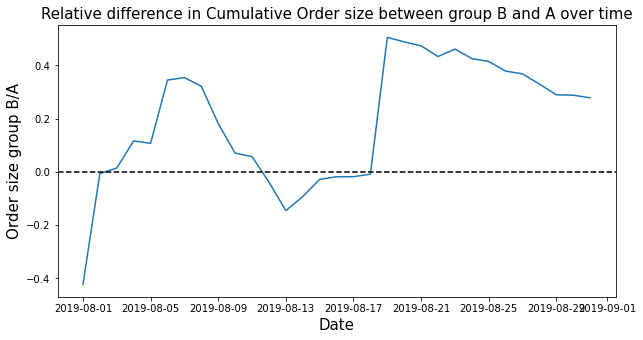

In [17]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
fig=plt.figure(figsize=(10,5))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Relative difference in Cumulative Order size between group B and A over time', size=15)
plt.xlabel('Date', size=15)
plt.ylabel('Order size group B/A', size=15)

plt.axhline(y=0, color='black', linestyle='--');

The difference pattern is not steady and constant, but rather with spikes. Therefoe we assume that there are some big orders and outliers. We'll have to find and remove them later. From this graph we cannot say whether there will be a difference in order size after outliers removal. 

#### <a id="four"></a> Conversion rate per group per day

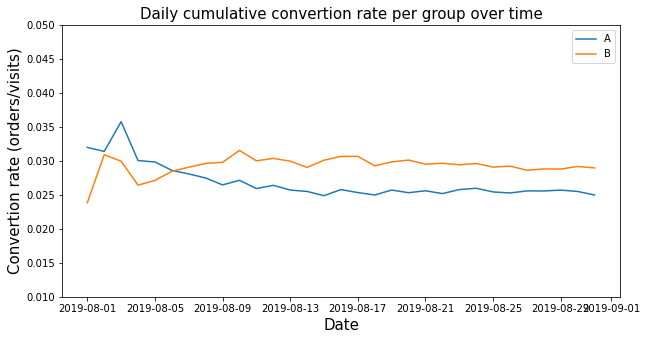

In [18]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
fig=plt.figure(figsize=(10,5))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Daily cumulative convertion rate per group over time', size=15)
plt.xlabel('Date', size=15)
plt.ylabel('Convertion rate (orders/visits)', size=15)
plt.ylim((0.01,0.05));

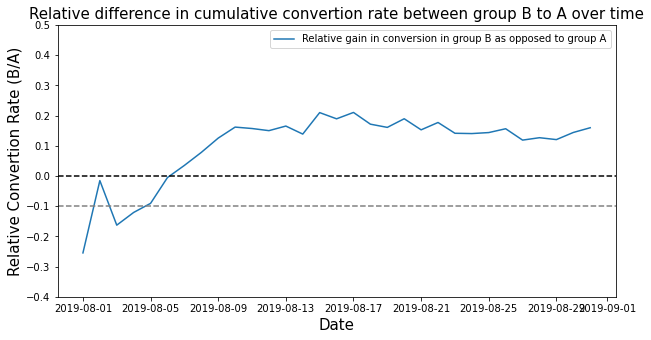

In [20]:
#calculating the relative difference in cumulative convertion rate between the groups:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
fig=plt.figure(figsize=(10,5))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()

plt.title('Relative difference in cumulative convertion rate between group B to A over time', size=15)
plt.xlabel('Date', size=15)
plt.ylabel('Relative Convertion Rate (B/A)', size=15)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.ylim((-0.4,0.5));

At the begining of the test the groups were fluctuating around the same value, but then the conversion rate of group B rose, and both groups stabilized.  
- graph scale was changed in order to ease graph interpretation. Without re-scaling, flactuation seems high, but the real differences are very small ( around 0.02).  

Relative difference demonstrate that group B was the leader almost from the begining of the test, and its around 15% higher than group A.

#### <a id="five"></a> Scatter chart of the number of orders per user 

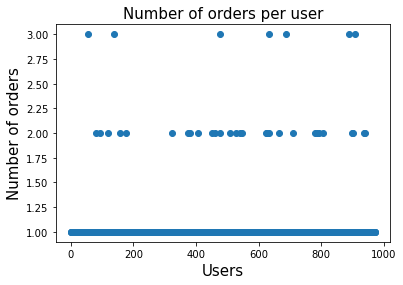

In [21]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby(
    'visitorId', as_index=False).agg({
    'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.head()
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Number of orders per user', size=15)
plt.xlabel('Users', size=15)
plt.ylabel('Number of orders', size=15);

We can see that most of the user ordered only once. But there are several users that ordered 2 or 3 times

#### <a id="six"></a> Top percentiles for the number of orders per user 

In [22]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

We can say that not more than 5% of users placed more than one order, and not more than 1% of the users placed more than two orders. Thus, it would be reasonable to set two orders per user as the upper limit for the number of orders and to filter out user with more than 2 orders.

#### <a id="seven"></a> Scatter chart of order prices

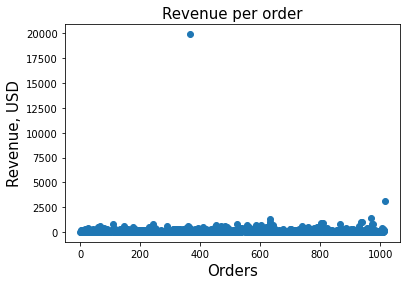

In [23]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Revenue per order', size=15)
plt.xlabel('Orders', size=15)
plt.ylabel('Revenue, USD', size=15);

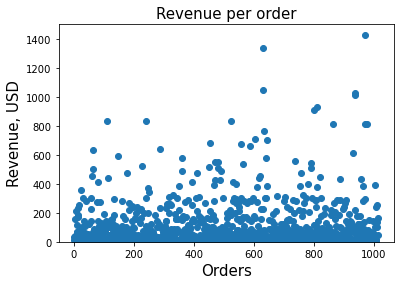

In [24]:
plt.scatter(x_values, orders['revenue']) 
plt.title('Revenue per order', size=15)
plt.xlabel('Orders', size=15)
plt.ylabel('Revenue, USD', size=15)
plt.ylim((0,1500));

Most of the orders are below 500 USD. Only few orders was more than 1000 USD.

#### <a id="eight"></a> Top percentiles of order prices 

In [25]:
np.percentile(orders['revenue'] , [90, 95, 99])

array([280.8  , 414.275, 830.3  ])

90% of the users pay less than 281 USD per orders. 95% of the user pay less than 414 USD per order, and 99% of the users pay less than 831 USD per order. Thus it would be reasonable to set 450$ as the limit for order price and to filter anomalies on that basis.

#### <a id="nine"></a> Difference in conversion between the groups (raw data) 

H0: There is no difference in the convertion rate of groups A and B  
H1: There is a difference in the convertion rate of groups A and B  

In [26]:

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

alpha=0.05
result = stats.mannwhitneyu(sampleA, sampleB)[1]
print("pvalue: {0:.4f}".format(result))

if (result < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")
    
print("The relative conversion gain for group B is {0:.1%}".format(sampleB.mean()/sampleA.mean()-1))

pvalue: 0.0055
Null hypothesis rejected: the difference is statistically significant
The relative conversion gain for group B is 16.0%


The p value is less than 0.05 so we can reject the null hypothesis: there is a statistically significant difference in convertion rate between group A and B in raw data. Convertion rate of group B is higher by 16% from that of group A.

#### <a id="ten"></a> Difference in average order size between the groups (raw data)

H0: There is no difference in the average order size between groups A and B  
H1: There is a difference in the average order size between groups A and B

In [27]:
result = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print("pvalue: {0:.5f}".format(result))

if (result < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")
print("The relative order size gain for group B is {0:.1%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

pvalue: 0.43112
Failed to reject the null hypothesis: we can't make conclusions about the difference
The relative order size gain for group B is 27.8%


The p-value is considerably higher than 0.05, so we cannot reject the null hypothesis and conclude that average order size differs between the groups in raw data. However, the average order size for group B is much higher than it is for group A.

#### <a id="eleven"></a> Difference in conversion between the groups (filtered data)

H0: There is no difference in the convertion rate of groups A and B  
H1: There is a difference in the convertion rate of groups A and B  

In [28]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 450]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()


In [29]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

In [30]:
result = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print("pvalue: {0:.3f}".format(result))

if (result < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

    
print("The relative conversion gain for group B is {0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

pvalue: 0.005
Null hypothesis rejected: the difference is statistically significant
The relative conversion gain for group B is 18.8%


As with the raw data, also in filered data the p value is less than 0.05. Therefore, we can reject the null hypothesis: there is a statistically significant difference in convertion rate between group A and B. In filtered data the relative difference in convertion rate of group B as compared with group A was even increased, from 16% to 18.8%. So regarding convertion rate, the test was a sucsses.

#### <a id="twelve"></a> Difference in average order size between the groups (filtered data)  

H0: There is no difference in the average order size between groups A and B  
H1: There is a difference in the average order size between groups A and B

In [32]:
result = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]
print("pvalue: {0:.2f}".format(result))

if (result < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")
print("The relative order size gain for group B is {0:.1%}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

pvalue: 0.39
Failed to reject the null hypothesis: we can't make conclusions about the difference
The relative order size gain for group B is -2.5%


As with the raw data, also in filtered data the p-value is higher than 0.05. Therefore, we cannot reject the null hypothesis and conclude that average order size differs between the groups. Moreover, the relative difference in average order size between group B and A was dramatically decreased. While in raw data it was 27.8%, in filtered data it's -2.5%, so the average order size for group B is much smaller than it is for group A. Hence, we can conclude that regarding the order size, the test was not a sucsses, and there is no difference between the groups.

In [33]:
#In order to look at total revenue per group, we first need to remove users with abnormal purchase size or number of orders:
orders_wo_abnormalUsers = orders.query('visitorId not in @abnormalUsers')
groupA_rev = orders_wo_abnormalUsers.query('group == "A"')
groupB_rev = orders_wo_abnormalUsers.query('group == "B"')

print('The difference in total revenue between group B to A is {0:.1%}'.format((groupB_rev.revenue.sum()/groupA_rev.revenue.sum())-1))

print('The difference in group size (B/A) in filtered data is {0:.1%}'.format((len(groupB_rev)/len(groupA_rev))-1))
print('The difference in group size (B/A) in raw data is {0:.1%}'.format((len(groupB)/len(groupA))-1))

The difference in total revenue between group B to A is 16.9%
The difference in group size (B/A) in filtered data is 19.9%
The difference in group size (B/A) in raw data is 14.9%


### <a id="conclusion"></a> Final conclusions

Final conclusions:   
In this report we worked with a list of suggested hypotheses and the parameters needed for priority decision, as well as data containing the results of an A/B test from August 2019.   
Data was pre-processed and analzed, and our findings are as follows:  
part I:  
- By the ICE method, the hypothesis with the highest score is no. 8.  
- By the RICE method, the hypothesis with the highest score is no. 7, and no.8 is rated the 5th. 

Part II:  
- There is a statistically significant difference in conversion between the groups, according to both the raw and the filtered data.
- The graph of the difference in conversion between the groups shows that group B's results are better than those of group A: convertion is stabilized at around 15% higher than group A.
- Nor the raw data or the filtered data show a statistically significant difference between the groups's average purchase size. Moreover, after the anomalies were removed, it turned out that the average purchase size of group B is even lower than that of group A.
- Revenue was rising steadily throughout the whole test for both groups. The cumulative revenue of group B was higher than group A along the test (after the first few days), but it seems that there was a jump in revenue of group B thanks to abnormal orders.
- Total revenue of group B is 20.3% higher than group A's total revenue in filtered data.
- The size of group B is 20.5% bigger than the size of group A. 

Based on the facts listed above we consider group B as the leader, therefore the test was a sucsses. Since the convertion rate was increased, more users become buyers. Thus, although each purchase size was not changed, we expect total revenue to be elevated. Thus, the hypotheses testing goal, to boost revenue, can be achived.  
Sine convertion rate is calculated by dividing order's number by user's number within each group, we believe that the different group size did not affect that result.     
We can see that total revenue of group B is higher by 20% from that of group A, but since the size of group B is higher from the size of group A at the same percantage we cannot conclude anything from that.  
We would recommand to continue the experiment in order to gain more users, equal group's size and strenghth the test results.